some basic todos resulting from this:

+ Get together a clear model & method, understand the code and the simulations you are running
+ Clarify for yourself how the coefficients in a differential equation thing should match to my model

In [13]:
import numpy as np
import networkx as nx
from collections import defaultdict

In [156]:
# network and group sizes
N = 500
p1 = 0.1

N1 = int(N*p1)
N2 = N-N1

# p(inf | mode1, mode2 interaction)
b = {
    1:1,
    2:0.3
}

# interaction within and between groups
p11, p12, p22 = 0.8, 0.1, 0.3

# g1, g2, mode
p = {
    (1,1,1): 0.8,
    (1,2,1): 0.1,
    (2,2,1): 0.3,
    (1,1,2): 0.25,
    (1,2,2): 0.1,
    (2,2,2): 0.25,
}

In [157]:
es = []
ns = list(range(N))

In [158]:
grp = [
    1 + (ii >= N1)
    for ii in ns
]

In [159]:
g = defaultdict(set)
for ii in ns:
    g[ grp[ii] ].add(ii)

# generate a definite network

In [160]:
from random import random as rnd

In [161]:
for i in ns:
    for j in ns:
        if i >= j: continue
        
        for mode in (1,2):
            if rnd() < p[ (grp[i], grp[j], mode) ]:
                es.append( (i,j, mode) )

In [162]:
np.product([1,2,3])

6

In [163]:
from itertools import groupby

In [164]:
[x[:2] for x in es[:10]]

[(0, 1),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 6),
 (0, 8),
 (0, 9),
 (0, 9),
 (0, 10)]

In [165]:
es_tot = [
    (a1,a2, 1 - np.product( [b[mode] for (a1,a2,mode) in g] ))
    for (a1,a2), g in groupby(sorted(es), key=lambda x:x[:2])
]

In [166]:
len(es), len(es_tot)

(61520, 53360)

In [167]:
G = nx.Graph()

In [168]:
G.add_nodes_from(ns)
G.add_weighted_edges_from(es_tot)

# try to simulate some disease spreading

In [169]:
from epi_model import *

In [170]:
from random import sample

In [171]:
net = weightedNetwork(ns, es_tot)

In [172]:
#sim = SEIR_daily(net, {'s2e':1, 'e2i':0.01, 'i2r':0})
sim = SEIR_daily(net, params.covid_estimate)

In [173]:
for ii in sample(ns, int(N*0.2)):
    sim.state_change(ii, 'inf')
sim.run(50)

In [175]:
params.covid_estimate

{'s2e': 0.0006, 'e2i': 2.3148148148148147e-05, 'i2r': 1.6534391534391536e-05}

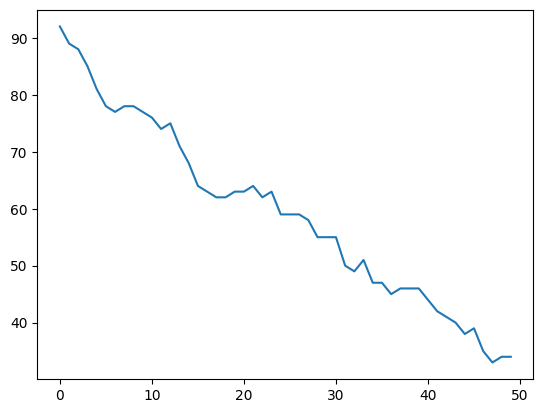

In [174]:
plt.plot( sim.meas['inf'] )